HIA302 Data Collection and Preparation - Individual Project

Part 2: Data Collection and Preparation Practical

Dataset and python library preparation

In [67]:
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
# Import libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

A. Demonstrate different ways to convert the horse-colic.txt file to horse-colic.csv.

In [69]:
# Load the txt file
raw_data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic.txt', sep=',', header=None)
print("\nHorse-colic data  \n", raw_data)

# Method 1 - Using pandas library to convert txt file into csv file
raw_data.to_csv(r'/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic_pd.csv', sep=',', header=None, index=None)

# Method 2 - Using csv package to convert txt file into csv file
with open('/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic.txt', 'r') as txt_file:
    lines = txt_file.readlines()
    data = [line.strip().split(',') for line in lines]

    with open('/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic_csv.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file, delimiter=',')
        writer.writerows(data)

# Method 3: Using numpy library
data = np.genfromtxt(r'/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic.txt', delimiter=',', dtype=str)
print("\nHorse-colic data \n", data)

np.savetxt(r'/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic_np.csv', data, delimiter=',', fmt='%s')


Horse-colic data  
     0   1        2      3    4   5  6  7  8  9   ...     18    19 20    21 22  \
0    2   1   530101  38.50   66  28  3  3  ?  2  ...  45.00  8.40  ?     ?  2   
1    1   1   534817   39.2   88  20  ?  ?  4  1  ...     50    85  2     2  3   
2    2   1   530334  38.30   40  24  1  1  3  1  ...  33.00  6.70  ?     ?  1   
3    1   9  5290409  39.10  164  84  4  1  6  2  ...  48.00  7.20  3  5.30  2   
4    2   1   530255  37.30  104  35  ?  ?  6  2  ...  74.00  7.40  ?     ?  2   
..  ..  ..      ...    ...  ...  .. .. .. .. ..  ...    ...   ... ..   ... ..   
295  1   1   533886      ?  120  70  4  ?  4  2  ...     55    65  ?     ?  3   
296  2   1   527702  37.20   72  24  3  2  4  2  ...  44.00     ?  3  3.30  3   
297  1   1   529386  37.50   72  30  4  3  4  1  ...  60.00  6.80  ?     ?  2   
298  1   1   530612  36.50  100  24  3  3  3  1  ...  50.00  6.00  3  3.40  1   
299  1   1   534618   37.2   40  20  ?  ?  ?  ?  ...     36    62  1     1  3   

    23

B. Demonstrate that the csv file can read in Jupyter Notebook and display the dataset.

In [70]:
#B. Loading the horse-colic.csv file
# Method 1 - pandas library
df_pd = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic_pd.csv', header=None)
df_pd.info()
df_pd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       300 non-null    object
 1   1       300 non-null    int64 
 2   2       300 non-null    int64 
 3   3       300 non-null    object
 4   4       300 non-null    object
 5   5       300 non-null    object
 6   6       300 non-null    object
 7   7       300 non-null    object
 8   8       300 non-null    object
 9   9       300 non-null    object
 10  10      300 non-null    object
 11  11      300 non-null    object
 12  12      300 non-null    object
 13  13      300 non-null    object
 14  14      300 non-null    object
 15  15      300 non-null    object
 16  16      300 non-null    object
 17  17      300 non-null    object
 18  18      300 non-null    object
 19  19      300 non-null    object
 20  20      300 non-null    object
 21  21      300 non-null    object
 22  22      300 non-null    ob

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,?,120,70,4,?,4,2,...,55,65,?,?,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,?,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,?,?,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


In [71]:
# Method 2 - csv library
df_csv = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic_csv.csv', header=None)
df_csv.info()
df_csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       300 non-null    object
 1   1       300 non-null    int64 
 2   2       300 non-null    int64 
 3   3       300 non-null    object
 4   4       300 non-null    object
 5   5       300 non-null    object
 6   6       300 non-null    object
 7   7       300 non-null    object
 8   8       300 non-null    object
 9   9       300 non-null    object
 10  10      300 non-null    object
 11  11      300 non-null    object
 12  12      300 non-null    object
 13  13      300 non-null    object
 14  14      300 non-null    object
 15  15      300 non-null    object
 16  16      300 non-null    object
 17  17      300 non-null    object
 18  18      300 non-null    object
 19  19      300 non-null    object
 20  20      300 non-null    object
 21  21      300 non-null    object
 22  22      300 non-null    ob

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,?,120,70,4,?,4,2,...,55,65,?,?,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,?,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,?,?,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


In [72]:
# Method 3 - numpy library
df_np = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic_np.csv', header=None)
df_np.info()
df_np

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       300 non-null    object
 1   1       300 non-null    int64 
 2   2       300 non-null    int64 
 3   3       300 non-null    object
 4   4       300 non-null    object
 5   5       300 non-null    object
 6   6       300 non-null    object
 7   7       300 non-null    object
 8   8       300 non-null    object
 9   9       300 non-null    object
 10  10      300 non-null    object
 11  11      300 non-null    object
 12  12      300 non-null    object
 13  13      300 non-null    object
 14  14      300 non-null    object
 15  15      300 non-null    object
 16  16      300 non-null    object
 17  17      300 non-null    object
 18  18      300 non-null    object
 19  19      300 non-null    object
 20  20      300 non-null    object
 21  21      300 non-null    object
 22  22      300 non-null    ob

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,?,120,70,4,?,4,2,...,55,65,?,?,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,?,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,?,?,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


C. Replace the missing values (i.e. with “?”) with a NaN (Not a Number) value.

In [73]:
# The horse-colic_pd.csv file and df_pd are used in the following section
df_nan = df_pd.replace('?', np.nan)
df_nan # View the replcament of '?' with NaN

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,45.00,8.40,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,74.00,7.40,NaN,NaN,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120,70,4,NaN,4,2,...,55,65,NaN,NaN,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,NaN,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,NaN,NaN,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


D. Save the latest dataset with NaN as horse-colic-with-NaN.csv

In [74]:
# Save the dataset with NaN into new csv file
df_nan.to_csv(r'/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic-with-NaN.csv', index=None, header=None)

E. Renaming header titles with 'horse-colic-with-NaN.csv'

In [75]:
# View the current header of the dataset
df_nan

# Changing the header
column_name = {df_nan.columns[0]:'Surgery',
               df_nan.columns[1]:'Age',
               df_nan.columns[2]:'HospNumber',
               df_nan.columns[3]:'RectalTemp',
               df_nan.columns[4]:'Pulse',
               df_nan.columns[5]:'RespRate',
               df_nan.columns[6]:'TempExtre',
               df_nan.columns[7]:'PeriPulse',
               df_nan.columns[8]:'MucousMem',
               df_nan.columns[9]:'CapRefTime',
               df_nan.columns[10]:'Pain',
               df_nan.columns[11]:'Peristal',
               df_nan.columns[12]:'AbdDist',
               df_nan.columns[13]:'NGTube',
               df_nan.columns[14]:'NGReflux',
               df_nan.columns[15]:'NGRefluxPH',
               df_nan.columns[16]:'RectExam',
               df_nan.columns[17]:'Abdomen',
               df_nan.columns[18]:'PCV',
               df_nan.columns[19]:'TotProtein',
               df_nan.columns[20]:'AbdoApp',
               df_nan.columns[21]:'AbdoPro',
               df_nan.columns[22]:'Outcome',
               df_nan.columns[23]:'SurgLesion',
               df_nan.columns[24]:'LesionT1',
               df_nan.columns[25]:'LesionT2',
               df_nan.columns[26]:'LesionT3',
               df_nan.columns[27]:'Cp_data'}

df_nan_renamed = df_nan.rename(columns=column_name)
df_nan_renamed

,Surgery,Age,HospNumber,RectalTemp,Pulse,RespRate,TempExtre,PeriPulse,MucousMem,CapRefTime,...,PCV,TotProtein,AbdoApp,AbdoPro,Outcome,SurgLesion,LesionT1,LesionT2,LesionT3,Cp_data
0,2,1,530101,38.50,66,28,3,3,NaN,2,...,45.00,8.40,NaN,NaN,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,NaN,NaN,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,NaN,NaN,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,NaN,NaN,6,2,...,74.00,7.40,NaN,NaN,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,NaN,120,70,4,NaN,4,2,...,55,65,NaN,NaN,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,NaN,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,NaN,NaN,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


F. Save the latest dataset with header title as horse-colic-with-title.csv

In [76]:
# Save the dataset with renamed header
df_nan_renamed.to_csv(r'/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic-with-title.csv', index=None)

G. Loading 'horse-colic-with-title.csv' and display list of total NaN at each column

In [77]:
# Load the dataset with header file
df_title = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic-with-title.csv')

# Count the number of missing (NaN) values in each column
NaN_counts = df_title.isna().sum()

# Print the counts
print(NaN_counts)

# Print the total number of missing values in all columns
NaN_counts.sum()

Surgery         1
Age             0
HospNumber      0
RectalTemp     60
Pulse          24
RespRate       58
TempExtre      56
PeriPulse      69
MucousMem      47
CapRefTime     32
Pain           55
Peristal       44
AbdDist        56
NGTube        104
NGReflux      106
NGRefluxPH    247
RectExam      102
Abdomen       118
PCV            29
TotProtein     33
AbdoApp       165
AbdoPro       198
Outcome         1
SurgLesion      0
LesionT1        0
LesionT2        0
LesionT3        0
Cp_data         0
dtype: int64


1605

H. Visualise the total NaN at each column in the dataset with a bar chart

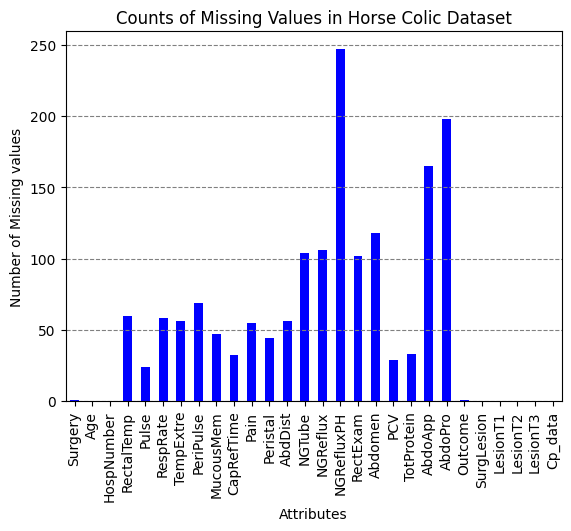

In [78]:
# Create a bar chart of the number of missing (NaN) values in each column
NaN_counts.plot(kind='bar', color='blue')
plt.xlabel('Attributes')
plt.ylabel('Number of Missing values')
plt.title('Counts of Missing Values in Horse Colic Dataset')
plt.grid(color='grey', linestyle='--', axis='y')
plt.show()

I. Retrieve the datatypes (e.g. float, integer, object, string etc.) for the dataset.

In [79]:
# Get the datatype
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Surgery     299 non-null    float64
 1   Age         300 non-null    int64  
 2   HospNumber  300 non-null    int64  
 3   RectalTemp  240 non-null    float64
 4   Pulse       276 non-null    float64
 5   RespRate    242 non-null    float64
 6   TempExtre   244 non-null    float64
 7   PeriPulse   231 non-null    float64
 8   MucousMem   253 non-null    float64
 9   CapRefTime  268 non-null    float64
 10  Pain        245 non-null    float64
 11  Peristal    256 non-null    float64
 12  AbdDist     244 non-null    float64
 13  NGTube      196 non-null    float64
 14  NGReflux    194 non-null    float64
 15  NGRefluxPH  53 non-null     float64
 16  RectExam    198 non-null    float64
 17  Abdomen     182 non-null    float64
 18  PCV         271 non-null    float64
 19  TotProtein  267 non-null    f

J. In this dataset, will it be a good idea to delete/drop out the NaN rows?

In [80]:
# Suppose we drop ou the NaN rows from the dataset
df_title.dropna()

# No, it will not be a good idea to drop out all the NaN rows from the dataset as the NaN rows make up a large percentage of the dataset.
# One of the attributes, nasogastric reflux PH (NGRefluxPH) has the highest count of missing values among all attributes, which are 247 NaN rows out of 300 rows in the dataset.
# If all the NaN rows are removed, there remaining data will be very limited for subsequent analysis and may present inaccurate result.

,Surgery,Age,HospNumber,RectalTemp,Pulse,RespRate,TempExtre,PeriPulse,MucousMem,CapRefTime,...,PCV,TotProtein,AbdoApp,AbdoPro,Outcome,SurgLesion,LesionT1,LesionT2,LesionT3,Cp_data
10,1.0,1,528548,38.1,66.0,12.0,3.0,3.0,5.0,1.0,...,44.0,6.0,2.0,3.6,1.0,1,2124,0,0,1
54,2.0,1,529461,40.3,114.0,36.0,3.0,3.0,1.0,2.0,...,57.0,8.1,3.0,4.5,3.0,1,7400,0,0,1
64,1.0,1,529667,39.0,64.0,36.0,3.0,1.0,4.0,2.0,...,44.0,7.5,3.0,5.0,1.0,1,2113,0,0,1
91,2.0,1,529461,40.3,114.0,36.0,3.0,3.0,1.0,2.0,...,57.0,8.1,3.0,4.5,2.0,1,3205,0,0,1
104,1.0,1,527563,37.8,52.0,24.0,1.0,3.0,3.0,1.0,...,48.0,6.6,1.0,3.7,2.0,1,5400,0,0,2
189,1.0,1,5299603,38.3,60.0,16.0,3.0,1.0,1.0,1.0,...,30.0,6.0,1.0,3.0,1.0,1,31110,0,0,2


K. Read and evaluate the following code in Figure 1. What method is the code using to reduce the missing value from 1605 to 0? Justify your answer.

In [81]:
# Based on Figure 1, it can be noted that SimpleImputer module from sklearn (scikit-learn) package is used.
# Line 21 shows the imputation strategy is 'mean'.
# Thus, the method applied to reduce missing values is mean imputation.

L. Fill out the inline comments marked with hashtags ‘#’ in lines 8, 11, 17, 20, 22 and 26.
Include the missing codes in lines 5 and 6.

In [82]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

dataframe = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/HIA302 Health Data Collection and Preparation/Individual Project/horse-colic_pd.csv', header=None) # Load dataset
dataframe = dataframe.apply(pd.to_numeric, errors='coerce') # Convert the entire DataFrame to numeric format, replacing '?' with NaN

# Retreive the values from the dataset in a numpy array
data = dataframe.values

# Creating arrays of X and Y and Extracting columns except the 23rd column
totalCol = data.shape[1]
ix = [i for i in range(totalCol) if i != 23]
X = data[:, ix]
y = data[:, 23]

# Check the total number of missing values before imputation
print('Missing: %d' % sum(isnan(X).flatten()))

# Imputation using mean strategy
imputer = SimpleImputer(strategy='mean')
# Fit the imputer and transform the data using array of X
imputer.fit(X)
Xtrans = imputer.transform(X)

# Check the total number of missing values after imputation
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0
